In [ ]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn geopandas shapely

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

file_path = '/content/drive/MyDrive/yelp_academic_dataset_business.json'
import os

print(os.path.exists(file_path))  # This should return True

True


In [ ]:
# Check the file size
file_size = os.path.getsize(file_path)
print(f"File size: {file_size / (1024 * 1024):.2f} MB")  # Convert bytes to MB

File size: 113.36 MB


In [ ]:
###### Here is a list of all kind of the businesses in the dataset

import json
import pandas as pd

businesses = []
with open(file_path, encoding='utf-8') as f:
    for line in f:
        businesses.append(json.loads(line))



business_df = pd.DataFrame(businesses)
business_df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
business_df.info()
business_df.isnull().sum()  # Summarize missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


,0
business_id,0
name,0
address,0
city,0
state,0
postal_code,0
latitude,0
longitude,0
stars,0
review_count,0


In [ ]:
# here we want to know what cities or states are included in dataset.
import pandas as pd

# Assuming your business dataset is loaded into a DataFrame called business_df
# Check unique states
unique_states = business_df['state'].unique()
print("Unique states in the dataset:", unique_states)

# Check unique cities
unique_cities = business_df['city'].unique()
print("Unique cities in the dataset:", unique_cities)

Unique states in the dataset: ['CA' 'MO' 'AZ' 'PA' 'TN' 'FL' 'IN' 'LA' 'AB' 'NV' 'ID' 'DE' 'IL' 'NJ'
 'NC' 'CO' 'WA' 'HI' 'UT' 'TX' 'MT' 'MI' 'SD' 'XMS' 'MA' 'VI' 'VT']
Unique cities in the dataset: ['Santa Barbara' 'Affton' 'Tucson' ... 'Wales' 'UPPER MORELAND'
 'Apollo beach']


In [ ]:
state_counts = business_df['state'].value_counts()
print(state_counts)


state
PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64


In [ ]:
# here we desire state/province is ALBERTA so we list of all businesses in Alberta
alberta_data = business_df[business_df['state'] == 'AB']
alberta_data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
46,JX4tUpd09YFchLBuI43lGw,Naked Cyber Cafe & Espresso Bar,10303 108 Street NW,Edmonton,AB,T5J 1L7,53.544682,-113.506589,4.0,12,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Arts & Entertainment, Music Venues, Internet S...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ..."
52,5BmQX4UVJY19mMtafMg7JA,Breadland Organic Whole Grain Bakery,"11642 104 Avenue, Unit 642",Edmonton,AB,T5K 2T7,53.547205,-113.522448,4.0,23,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Specialty Food, Bakeries, Food, Health Markets","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
53,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,AB,T5H 3B2,53.549633,-113.508780,5.0,20,0,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
77,mFTaYsRDyeFaY2NDLfSaAA,River City Games,5203 99 Street NW,Edmonton,AB,T6E 5B7,53.489312,-113.485567,4.5,5,1,"{'BusinessParking': '{'garage': False, 'street...","Tabletop Games, Shopping, Sporting Goods","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150263,VRSQk67FPiDQolDyiaFnjg,Citytv,10212 Jasper Ave NW,Edmonton,AB,T5J 5A3,53.541168,-113.495953,4.0,8,1,None,"Television Stations, Mass Media",None
150276,Rn3DtOiuJtc3whFySWXs5Q,Japanese Village,2940 Calgary Trail NW,Edmonton,AB,T6J 7C2,53.463917,-113.494702,3.0,35,1,"{'RestaurantsAttire': 'u'casual'', 'NoiseLevel...","Japanese, Restaurants, Steakhouses, Sushi Bars","{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ..."
150332,t_SGoRT5yt14OWr64TOulA,Sherwood Park Kwik Lube,979 Fir St,Sherwood Park,AB,T8A 4N5,53.513215,-113.328680,5.0,5,1,None,"Oil Change Stations, Automotive, Auto Repair",None
150340,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,53.509649,-113.675999,4.5,18,0,"{'Ambience': '{'touristy': False, 'hipster': F...","Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [ ]:

# Check unique business types (categories)
unique_categories = alberta_data['categories'].unique()
print("Unique categories in Alberta:", unique_categories)

Unique categories in Alberta: ['Coffee & Tea, Food, Cafes, Bars, Wine Bars, Restaurants, Nightlife'
 'Arts & Entertainment, Music Venues, Internet Service Providers, Nightlife, Food, Coffee & Tea, Jazz & Blues, Professional Services, Internet Cafes'
 'Specialty Food, Bakeries, Food, Health Markets' ...
 'Hobby Shops, Tabletop Games, Coffee & Tea, Food, Shared Office Spaces, Event Planning & Services, Restaurants, Cafes, Shopping, Bubble Tea, Filipino, Asian Fusion, Home Services, Real Estate'
 'Japanese, Restaurants, Steakhouses, Sushi Bars'
 'Oil Change Stations, Automotive, Auto Repair']


In [ ]:
# Count unique cities
unique_cities_ab = alberta_data['city'].unique()
print("Unique cities in Alberta:", unique_cities_ab)


Unique cities in Alberta: ['Edmonton' 'St Albert' 'Sherwood Park' 'St. Albert' 'Beaumont'
 'Saint Albert' 'NW Edmonton' 'Staint Albert' 'Spruce Grove'
 'West Edmonton' 'Southeast Edmonton' 'EdMonton' 'Eaux Claires'
 'Pilot Sound Area West Portion' 'Sturgeon Couny' 'East Edmonton' 'Enoch'
 'Old Strathcona' 'Sherwood' 'Alberta Park Industrial' 'AB Edmonton'
 'Fort Saskatchewan' 'Edmonton City Centre' 'Downtown']


Sample cleaned data:
                             name  \
57657                'Ono Poke Co   
1762             124 Grand Market   
75383                     1ST RND   
130337                    1st RND   
107357  24 Hours Pizza and Donair   

                                               categories cuisine  
57657                   restaurants, hawaiian, food, poke   other  
1762    fashion, farmers market, food, department stor...   other  
75383   burgers, sports bars, fast food, nightlife, am...   other  
130337  nightlife, burgers, bars, american (traditiona...   other  
107357           pizza, food, donairs, restaurants, halal   halal  

Correlation Matrix:
                 stars  review_count
stars         1.000000      0.145177
review_count  0.145177      1.000000


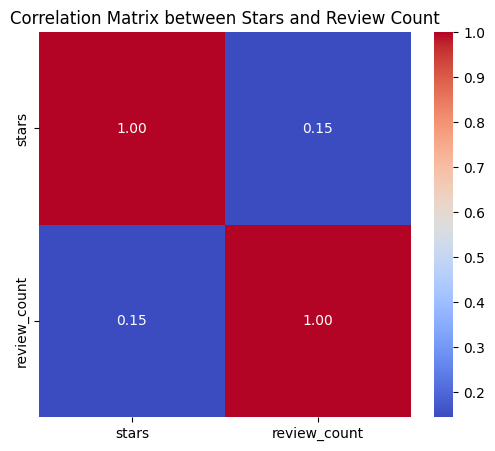

Names of all open restaurants in Alberta/Edmonton sorted by name and cuisine:


,name,cuisine
0,'Ono Poke Co,other
1,124 Grand Market,other
2,1ST RND,other
3,1st RND,other
4,24 Hours Pizza and Donair,halal
...,...,...
2031,Zuppa Cafe & Pizza,pizzeria
2032,Zwick's Pretzels,other
2033,deVine Wines & Spirits,other
2034,kb & co windermere,vegan



Total number of restaurants in Alberta/Edmonton: 2814
Total number of open restaurants in Alberta/Edmonton: 2036

Missing values in open restaurants DataFrame:
business_id       0
name              0
address           0
city              0
state             0
postal_code       0
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
attributes       70
categories        0
hours           323
cuisine           0
dtype: int64

Cleaned DataFrame shape: (2036, 15)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Define keywords related to restaurants
restaurant_keywords = [
    'restaurant', 'food', 'vegan', 'cuisine', 'bar', 'cafe',
    'diner', 'bistro', 'steakhouse', 'persian', 'healthy',
    'mexican', 'halal', 'indian', 'pizzeria', 'buffet',
    'brunch', 'takeout', 'fast food', 'bakery', 'grill',
    'bbq', 'catering', 'sandwich', 'seafood', 'sushi',
    'tavern', 'coffee', 'tea', 'pub', 'winery', 'dessert'
]

# Define cuisine keywords
cuisine_keywords = {
    'halal': ['halal', 'middle eastern'],
    'indian': ['indian', 'curry'],
    'mexican': ['mexican', 'taco'],
    'vegan': ['vegan', 'vegetarian'],
    'persian': ['persian'],
    'pizzeria': ['pizza', 'pizzeria'],
    'italian': ['italian', 'pasta', 'lasagna', 'risotto'],
    'japanese': ['japanese', 'sushi', 'ramen', 'tempura'],
    'chinese': ['chinese', 'noodles', 'dim sum', 'wontons'],
    'thai': ['thai', 'pad thai', 'curry', 'tom yum'],
    'french': ['french', 'crepes', 'bistro', 'ratatouille'],
    'korean': ['korean', 'kimchi', 'bulgogi'],
    'greek': ['greek', 'gyros', 'moussaka'],
    'cajun': ['cajun', 'creole', 'gumbo'],
    'other': ['restaurant']  # Catch-all category
}

# Function to extract cuisine based on keywords in the categories column
def extract_cuisine(categories):
    if pd.isna(categories):
        return 'other'  # Return 'other' if no categories are available
    for cuisine, keywords in cuisine_keywords.items():
        if any(keyword in categories for keyword in keywords):
            return cuisine
    return 'other'  # Return 'other' if no match is found

# Load the Yelp business dataset
# Assuming business_df is your main DataFrame containing the Yelp business data
# business_df = pd.read_csv('path_to_your_yelp_business_data.csv')

# Normalize and clean 'city' and 'categories' columns
business_df['city'] = business_df['city'].str.lower().str.strip()
business_df['categories'] = business_df['categories'].str.lower().str.strip()

# Filter businesses located in Alberta and specifically Edmonton
alberta_edmonton = business_df[(business_df['state'] == 'AB') &
                               (business_df['city'].str.contains('edmonton', case=False))]

# Filter for restaurant-related businesses using restaurant keywords
restaurants_in_alberta_edmonton = alberta_edmonton[
    alberta_edmonton['categories'].notna() &
    alberta_edmonton['categories'].str.contains('|'.join(restaurant_keywords), case=False)
]

# Exclude non-restaurant businesses using a list of keywords
non_restaurant_keywords = ['barber', 'salon', 'nail', 'spa']
restaurants_in_alberta_edmonton = restaurants_in_alberta_edmonton[
    ~restaurants_in_alberta_edmonton['categories'].str.contains('|'.join(non_restaurant_keywords),
                                                                case=False, na=False)
]

# Filter for open restaurants
open_restaurants = restaurants_in_alberta_edmonton[restaurants_in_alberta_edmonton['is_open'] == 1]

# Remove duplicates based on name and address
open_restaurants_sorted = open_restaurants.drop_duplicates(subset=['name', 'address'], keep='first').sort_values(by='name')

# Apply the function to create the 'cuisine' column
open_restaurants_sorted['cuisine'] = open_restaurants_sorted['categories'].apply(extract_cuisine)

# Sample cleaned data
print("Sample cleaned data:")
print(open_restaurants_sorted[['name', 'categories', 'cuisine']].head())

# Correlation analysis between 'stars' and 'review_count'
correlation_matrix = open_restaurants_sorted[['stars', 'review_count']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix between Stars and Review Count")
plt.show()

# Display names of open restaurants with separate 'name' and 'cuisine' columns
restaurants_by_name_and_cuisine = open_restaurants_sorted[['name', 'cuisine']].sort_values(by=['name', 'cuisine']).reset_index(drop=True)

print("Names of all open restaurants in Alberta/Edmonton sorted by name and cuisine:")
display(restaurants_by_name_and_cuisine)


# Display counts
print(f"\nTotal number of restaurants in Alberta/Edmonton: {len(restaurants_in_alberta_edmonton)}")
print(f"Total number of open restaurants in Alberta/Edmonton: {len(open_restaurants_sorted)}")

# Check for missing values
print("\nMissing values in open restaurants DataFrame:")
print(open_restaurants_sorted.isnull().sum())

# Drop any rows with missing values in important columns (like 'stars' and 'review_count')
open_restaurants_sorted.dropna(subset=['stars', 'review_count'], inplace=True)

# Reset the index after dropping rows
open_restaurants_sorted.reset_index(drop=True, inplace=True)

# Display the shape of the cleaned DataFrame
print("\nCleaned DataFrame shape:", open_restaurants_sorted.shape)


In [ ]:
#######.      loading attraction dataset   #########


import pandas as pd

# Load the attractions dataset using the correct path
attractions_df = pd.read_csv('/content/drive/My Drive/Attractions_20241001.csv')



In [ ]:
attractions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            56 non-null     object 
 1   LATITUDE        56 non-null     float64
 2   LONGITUDE       56 non-null     float64
 3   LOCATION        56 non-null     object 
 4   TYPE            56 non-null     object 
 5   Address         49 non-null     object 
 6   Quadrant        46 non-null     object 
 7   URL             46 non-null     object 
 8   POINT LOCATION  56 non-null     object 
dtypes: float64(2), object(7)
memory usage: 4.1+ KB


In [ ]:
# Display the first few rows to confirm successful loading
attractions_df.head()


,NAME,LATITUDE,LONGITUDE,LOCATION,TYPE,Address,Quadrant,URL,POINT LOCATION
0,Castle Downs Recreation Centre,53.616036,-113.520919,"(53.61603608576531, -113.52091910876221)",Recreation Centre,11520 - 153 Avenue NW,NaN,NaN,POINT (-113.52091910876221 53.61603608576531)
1,Callingwood Recreation Centre,53.505290,-113.628025,"(53.505290074821886, -113.62802544430254)",Recreation Centre,"17740 69 Ave NW, Edmonton, AB T5T 6X3",NW,https://www.edmonton.ca/callingwoodtwinarenas/,POINT (-113.62802544430254 53.505290074821886)
2,Londonderry Fitness and Leisure Centre,53.607451,-113.444181,"(53.60745050475148, -113.44418142821127)",Recreation Centre,"14528 66 St NW, Edmonton, AB T5C 3R7",NE,https://www.edmonton.ca/londonderry/,POINT (-113.44418142821127 53.60745050475148)
3,Kinsmen Twin Arenas,53.451244,-113.513893,"(53.45124394828186, -113.51389274892732)",Arena,"1979 111 St NW, Edmonton, AB T6J 7C6",SW,https://www.edmonton.ca/kinsmentwinarenas/,POINT (-113.51389274892732 53.45124394828186)
4,Oliver Outdoor Swimming Pool,53.544975,-113.526329,"(53.54497536060087, -113.52632872596271)",Pool,"10315 119 St NW, Edmonton, AB T5K 1Z6",NE,https://www.edmonton.ca/oliverpool/,POINT (-113.52632872596271 53.54497536060087)


In [ ]:
import pandas as pd
import numpy as np

# Load the attractions dataset
attractions_df = pd.read_csv('/content/drive/My Drive/Attractions_20241001.csv')

# Normalize column names
attractions_df.columns = [col.lower().strip() for col in attractions_df.columns]

# Check for missing values and fill or drop as needed
attractions_df.dropna(subset=['latitude', 'longitude'], inplace=True)

# Define the Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of Earth in kilometers
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c  # Distance in kilometers
    return distance

# Set the desired radius (e.g., 1 kilometer)
radius = 1.0  # in kilometers


# Create a new column in the restaurants DataFrame to hold the attractions close to each restaurant
open_restaurants_sorted['nearby_attractions'] = open_restaurants_sorted.apply(
    lambda row: attractions_df[
        haversine(row['latitude'], row['longitude'], attractions_df['latitude'], attractions_df['longitude']) <= radius
    ]['name'].tolist(),
    axis=1
)

# Create a new column indicating whether the restaurant has higher stars if nearby attractions exist
open_restaurants_sorted['higher_stars_near_attractions'] = open_restaurants_sorted.apply(
    lambda row: row['stars'] > 3.5 if len(row['nearby_attractions']) > 0 else False,
    axis=1
)

# Display the first few rows of the DataFrame
print("Open Restaurants with Nearby Attractions and Higher Stars Indicator:")
display(open_restaurants_sorted[['name', 'stars', 'nearby_attractions', 'higher_stars_near_attractions']].head(10))




Open Restaurants with Nearby Attractions and Higher Stars Indicator:


,name,stars,nearby_attractions,higher_stars_near_attractions
0,'Ono Poke Co,4.0,[Downtown Community Arena],True
1,124 Grand Market,4.5,[Oliver Arena],True
2,1ST RND,3.5,[],False
3,1st RND,3.5,"[Oliver Outdoor Swimming Pool, Oliver Arena]",False
4,24 Hours Pizza and Donair,1.5,[],False
5,4404 Restaurant,3.5,[],False
6,6th Sense Cafe,3.5,[Mill Woods Recreation Centre],False
7,720 Sweets WEM,5.0,[],False
8,80 Flavours Ice Cream,4.5,[],False
9,80 Flavours Ice Cream,4.0,[Jasper Place Fitness and Leisure Centre],True


In [ ]:
# Check latitude and longitude ranges for open_restaurants_sorted
print("Restaurants Latitude Range:", open_restaurants_sorted['latitude'].min(), "to", open_restaurants_sorted['latitude'].max())
print("Restaurants Longitude Range:", open_restaurants_sorted['longitude'].min(), "to", open_restaurants_sorted['longitude'].max())

# Check latitude and longitude ranges for attractions_df
print("Attractions Latitude Range:", attractions_df['latitude'].min(), "to", attractions_df['latitude'].max())
print("Attractions Longitude Range:", attractions_df['longitude'].min(), "to", attractions_df['longitude'].max())


Restaurants Latitude Range: 53.3969781497 to 53.6791969
Restaurants Longitude Range: -113.69729 to -113.2931784
Attractions Latitude Range: 53.45124394828186 to 53.61603608576531
Attractions Longitude Range: -113.62802544430254 to -113.3710378916788


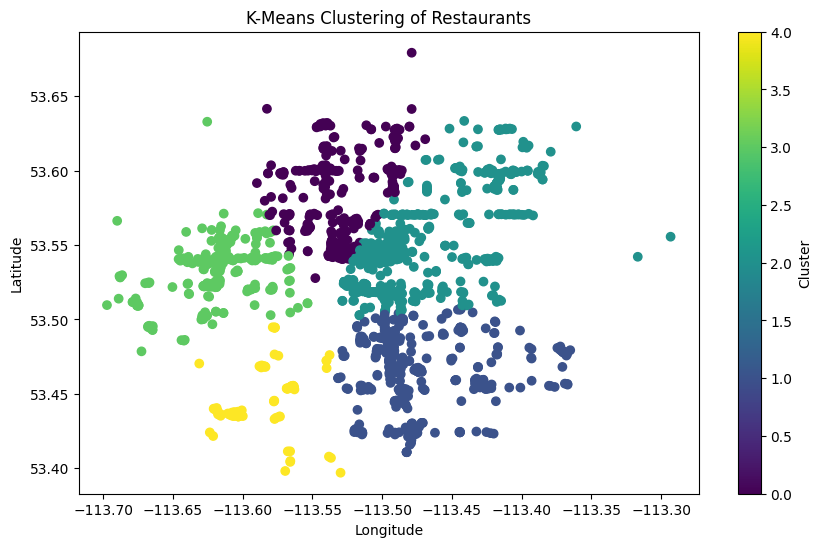

In [ ]:
##### Cluster 1: High-rated restaurants near major attractions.
#######Cluster 2: Moderate-rated restaurants located in suburban areas.
#########Cluster 3: Lower-rated restaurants that might be further from tourist hotspots




from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select features for clustering
features = open_restaurants_sorted[['latitude', 'longitude']]

# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # You can change the number of clusters
open_restaurants_sorted['cluster'] = kmeans.fit_predict(features)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(open_restaurants_sorted['longitude'], open_restaurants_sorted['latitude'], c=open_restaurants_sorted['cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering (latitude and longitude)
features = open_restaurants_sorted[['latitude', 'longitude']]

# Initialize KMeans for clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjusting to 3 clusters for the specific labels
open_restaurants_sorted['cluster'] = kmeans.fit_predict(features)

# Define the labels for clusters based on star ratings and proximity assumptions
def label_clusters(row):
    if row['stars'] >= 4.0:
        return "Cluster 1: High-rated restaurants near major attractions"
    elif 3.0 <= row['stars'] < 4.0:
        return "Cluster 2: Moderate-rated restaurants located in suburban areas"
    else:
        return "Cluster 3: Lower-rated restaurants that might be further from tourist hotspots"

# Apply the labeling function to each restaurant
open_restaurants_sorted['cluster_label'] = open_restaurants_sorted.apply(label_clusters, axis=1)

# Create a color map for the clusters
cluster_colors = {
    "Cluster 1: High-rated restaurants near major attractions": 'green',
    "Cluster 2: Moderate-rated restaurants located in suburban areas": 'blue',
    "Cluster 3: Lower-rated restaurants that might be further from tourist hotspots": 'red'
}

# Create a base map centered around Edmonton
map_edmonton = folium.Map(location=[53.5444, -113.4909], zoom_start=12)

# Add restaurants to the map with different colors based on cluster label
for _, row in open_restaurants_sorted.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['name']} ({row['cluster_label']}) - Stars: {row['stars']}",
        icon=folium.Icon(color=cluster_colors[row['cluster_label']], icon='cutlery')
    ).add_to(map_edmonton)

# Add tourist attractions to the map from the attractions_df
for _, row in attractions_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='orange', icon='info-sign')
    ).add_to(map_edmonton)

# Save the map to an HTML file
map_edmonton.save('/content/drive/My Drive/edmonton_restaurants_clusters_map.html')

# Display the map (Note: this will work in a Jupyter environment)
map_edmonton


In [ ]:
##### important findings
# location in general (i.e., just based on latitude and longitude) does not have a significant impact on restaurant ratings (stars)
# However, when you specifically look at restaurants that are near tourist
# attractions,there is a noticeable increase in their average star ratings.
# Restaurants close to attractions tend to have higher ratings, indicating that
# being near an attraction does have a positive influence on restaurant ratings.


In [ ]:
file_path = '/content/drive/MyDrive/yelp_academic_dataset_review.json'
import os

print(os.path.exists(file_path))  # This should return True

True


In [ ]:
# Load a limited number of lines (e.g., the first 1000)
import pandas as pd
import json

# Load a limited number of lines (e.g., the first 1000)
# Define the path to Yelp review dataset
review_file_path = '/content/drive/MyDrive/yelp_academic_dataset_review.json'
sample_reviews = []
with open(review_file_path, encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= 1000:  # Limit to the first 1000 lines
            break
        sample_reviews.append(json.loads(line))

# Convert the sample list of dictionaries to a pandas DataFrame
sample_reviews_df = pd.DataFrame(sample_reviews)

# Display the first few rows of the sample DataFrame
sample_reviews_df.head()
sample_reviews_df.shape





(1000, 9)

In [ ]:
sample_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    1000 non-null   object 
 1   user_id      1000 non-null   object 
 2   business_id  1000 non-null   object 
 3   stars        1000 non-null   float64
 4   useful       1000 non-null   int64  
 5   funny        1000 non-null   int64  
 6   cool         1000 non-null   int64  
 7   text         1000 non-null   object 
 8   date         1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [ ]:

sample_reviews_df.describe()

NameError: name 'sample_reviews_df' is not defined

In [ ]:
sample_reviews_df.drop_duplicates(subset=['review_id'], inplace=True)

In [ ]:

# convert the date column to a datetime format:
sample_reviews_df['date'] = pd.to_datetime(sample_reviews_df['date'])  # Adjust this if needed

# Check the date range in the DataFrame
# Get the date range
min_date = sample_reviews_df['date'].min()
max_date = sample_reviews_df['date'].max()

print("Date Range:")
print("Start Date:", min_date)
print("End Date:", max_date)

NameError: name 'pd' is not defined

In [ ]:
#######1. Predominant Sentiments Expressed in Yelp Reviews

import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load Yelp reviews dataset
reviews_df = pd.read_json('/content/drive/MyDrive/yelp_academic_dataset_review.json', lines=True)

# Filter for open restaurants in Edmonton (assuming you have a separate business dataset)
business_df = pd.read_json('/content/drive/MyDrive/yelp_academic_dataset_business.json', lines=True)
open_restaurants = business_df[(business_df['city'] == 'Edmonton') & (business_df['is_open'] == 1)]
reviews_df = reviews_df[reviews_df['business_id'].isin(open_restaurants['business_id'])]

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Binary classification

# Tokenize the reviews
inputs = tokenizer(reviews_df['text'].tolist(), padding=True, truncation=True, return_tensors="pt", max_length=512)

# Get predictions
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

# Add sentiment predictions to DataFrame
reviews_df['sentiment'] = predictions.numpy()

# Calculate average sentiment for each restaurant
avg_sentiment = reviews_df.groupby('business_id')['sentiment'].mean().reset_index()
avg_sentiment = avg_sentiment.merge(open_restaurants[['business_id', 'name']], on='business_id', how='left')

# Display results
print(avg_sentiment.sort_values(by='sentiment', ascending=False).head())


In [ ]:
import pandas as pd
import json
from transformers import BertTokenizer

# Load a limited number of lines (e.g., the first 1000)
review_file_path = '/content/drive/MyDrive/yelp_academic_dataset_review.json'
sample_reviews = []
with open(review_file_path, encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= 1000:  # Limit to the first 1000 lines
            break
        sample_reviews.append(json.loads(line))

# Convert the sample list of dictionaries to a pandas DataFrame
sample_reviews_df = pd.DataFrame(sample_reviews)

# Convert the date column to a datetime format
sample_reviews_df['date'] = pd.to_datetime(sample_reviews_df['date'])

# Display the shape and first few rows of the DataFrame
print("Shape of DataFrame:", sample_reviews_df.shape)
print("First few rows of the sample DataFrame:")
display(sample_reviews_df.head())

# Check the date range in the DataFrame
min_date = sample_reviews_df['date'].min()
max_date = sample_reviews_df['date'].max()

print("\nDate Range:")
print("Start Date:", min_date)
print("End Date:", max_date)



Shape of DataFrame: (1000, 9)
First few rows of the sample DataFrame:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15



Date Range:
Start Date: 2005-05-11 13:51:10
End Date: 2018-10-04 16:18:51


NameError: name 'filtered_df' is not defined

In [ ]:
r
